# Two Perspectives on Machine Learning

Machine learning can be understood through two complementary lenses:

## Linear Algebra Perspective: The "How"
- Focus: **Computation and mechanics**
- Key questions: How do we find the parameters? What's the formula? How do we implement it efficiently?
- Tools: Matrices, vectors, derivatives, numerical optimization
- Example: "Minimize $\|\mathbf{y} - \mathbf{Xw}\|^2$ by solving $\mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$"
- Strength: Fast algorithms, concrete computational steps

## Statistical Perspective: The "Why"
- Focus: **Assumptions and justification**
- Key questions: Why this loss function? What are we assuming about the data? Where do these methods come from?
- Tools: Probability distributions, likelihood, expectations
- Example: "Why MSE? Because if we assume Gaussian noise, minimizing MSE = maximizing likelihood."
- Strength: Principled foundations, connects data assumptions to algorithm choice

---

## Today's Approach

**We take the statistical perspective.** Rather than just accepting "use MSE for regression" or "add L2 regularization," we'll derive *why* these choices make sense based on assumptions about how data is generated.

You'll see that ML techniques aren't arbitrary—they're the logical consequence of our beliefs about noise, distributions, and parameters.

# ML Pipeline

## 1. Problem Definition
- Regression? Classification? Time series?

## 2. Data Collection
- Sources, APIs, databases

## 3. Exploratory Data Analysis (EDA)
- Distributions
- Correlations
- Missing values
- Outliers

## 4. Feature Engineering
- Transformations (log, sqrt)
- Interactions
- Encoding (one-hot, target)
- Domain-specific features

## 5. Train/Val/Test Split
- Respect time order if applicable

## 6. Preprocessing
- Scaling/Normalization (fit on train only!)
- Imputation (fill missing)
- Encoding

## 7. Model Selection
- Start simple (linear, logistic)
- Try trees (Random Forest, XGBoost)
- Neural networks if needed

## 8. Training ⭐
- Choose loss function
- Gradient descent
- Monitor train vs. validation

## 9. Hyperparameter Tuning ⭐
- Cross-validation grid search

## 10. Evaluation ⭐
- Multiple metrics
- Residual analysis
- Confusion matrix (classification)

## 11. Diagnosis ⭐
- Bias (underfitting)? → Add complexity
- Variance (overfitting)? → Regularize
- Both? → Get more data

## 12. Final Test
- Evaluate on held-out test set

## 13. Deployment
- Model serialization
- API/serving
- Monitoring drift

## **Likelihood vs. Probability**

**Probability**: Given the parameters, what data might we observe? <br><br>
$$
P(\text{data} | \theta) \quad
$$

$$
\footnotesize \text{where } \theta \text{ is fixed} \text{ and } P \text{ is PMF (discrete) or PDF (continuous)}
$$

<br><br>
**Likelihood**: Given the observed data, what parameters best explain it?<br><br>

$$
\mathcal{L}(\theta | \text{data}) \quad
$$

$$
\footnotesize \text{where data is fixed}
$$

#### **Exempli gratia: Coin Flips**

*Probability question*: Given a fair coin ($p = 0.5$), what's the probability of getting tails?<br><br>
$$
P(X = \text{tail} | p = 0.5) = 0.5
$$

<br><br>*Likelihood question*: Observed 8 tails out of 10 flips. Which parameter $p$ makes this data most likely?<br><br>
$$
\mathcal{L}(p | \text{8 tails in 10 flips}) = \binom{10}{8} p^8 (1-p)^2
$$

The MLE gives $\hat{p}_{\text{MLE}} = 0.8$.

#### We maximize likelihood during training to learn parameters, then use those parameters to make predictions during inference

### **Summary**

Any PMF or PDF formula $f(x \mid \theta)$ can be read two ways:

| Interpretation | What's fixed? | What varies? | Question |
|---------------|---------------|--------------|----------|
| **Probability/Density** | parameters θ | data x | "Given θ, how probable/dense is x?" |
| **Likelihood** | data x | parameters θ | "Given x, how plausible is θ?" |

## **MLE or Maximum Likelihood Estimation**

**Which parameter maximizes the probability of the observed data?**

### Likelihood

$$
\mathcal{L}(\theta; \mathbf{x}) = P(\mathbf{x} | \theta) = \prod_{i=1}^{n} P(x_i | \theta)
$$

where:
- $\theta$ = model parameters
- $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ = observed data
- $P(x_i | \theta)$ = probability mass function (PMF) for discrete data or probability density function (PDF) for continuous data
<br><br>

### **MLE**

$$
\hat{\theta}_{\text{MLE}} = \underset{\theta}{\arg\max} \, \mathcal{L}(\theta; \mathbf{x}) = \underset{\theta}{\arg\max} \,\prod_{i=1}^{n} P(x_i | \theta)
$$

## **Log-Likelihood**

#### Why?

1. **Computational stability:** Prevents underflow (products of small probabilities → zero even in `float64`)

2. **Mathematical convenience:** Turns products into sums, simplifies derivatives

In [1]:
import sys
sys.path.append('../')
from src.mle_widget import COLORS
import matplotlib.pyplot as plt
import numpy as np

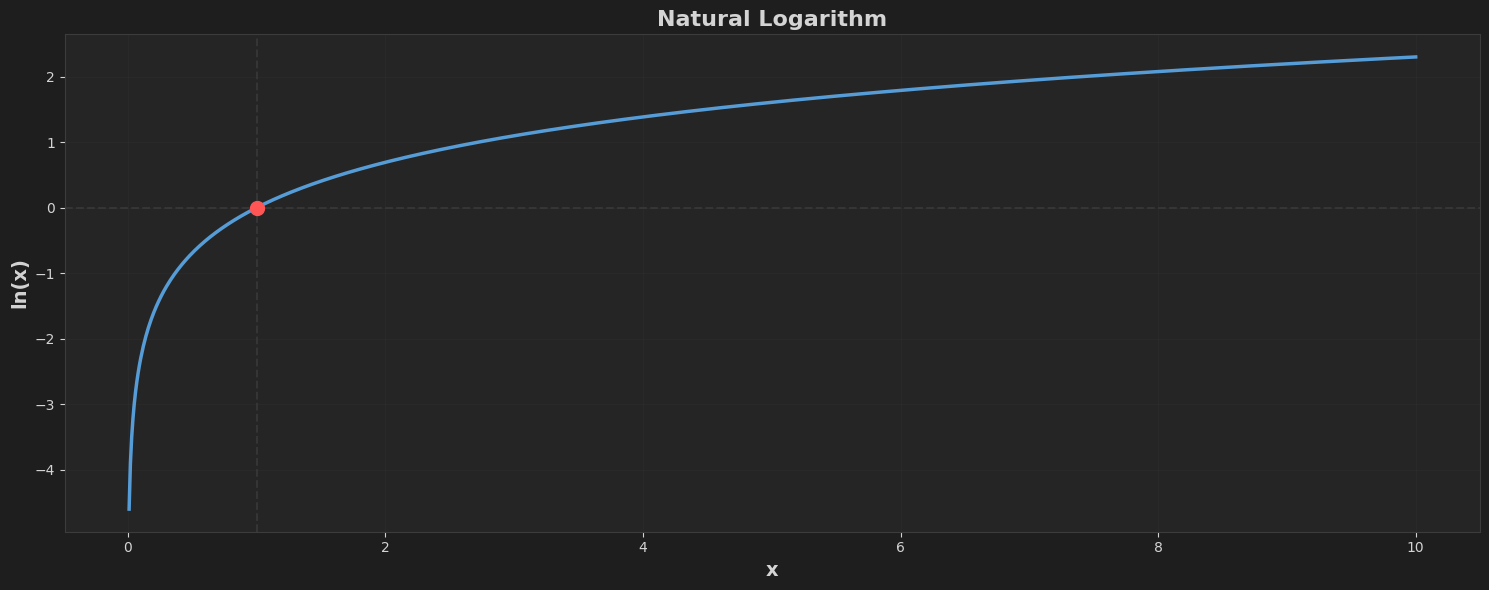

In [2]:
x = np.linspace(0.01, 10, 1000)
y = np.log(x)

fig, ax = plt.subplots(figsize=(15, 6))
fig.patch.set_facecolor(COLORS['bg'])
ax.set_facecolor(COLORS['paper'])

ax.plot(x, y, linewidth=2.5, color=COLORS['blue'])
ax.axhline(0, color=COLORS['grid'], linestyle='--', alpha=0.7, linewidth=1.5)
ax.axvline(1, color=COLORS['grid'], linestyle='--', alpha=0.7, linewidth=1.5)
ax.scatter([1], [0], color=COLORS['red'], s=100, zorder=5)
ax.grid(alpha=0.2, color=COLORS['grid'])
ax.set_xlabel('x', fontsize=14, color=COLORS['text'], fontweight='bold')
ax.set_ylabel('ln(x)', fontsize=14, color=COLORS['text'], fontweight='bold')
ax.set_title('Natural Logarithm', fontsize=16, color=COLORS['text'], fontweight='bold')
ax.tick_params(colors=COLORS['text'])
for spine in ax.spines.values():
    spine.set_edgecolor(COLORS['grid'])

plt.tight_layout()
plt.show()

### **Computational stability aka Underflow (NICHT GUT)**

In [3]:
from scipy.stats import norm
import numpy as np

x = 34
pdf_value = norm.pdf(x, loc=0, scale=1)
log_pdf = np.log(pdf_value)

print(f"PDF at x={x}: {pdf_value:.100f}")
print(f"Log PDF: {log_pdf:.10f}")

PDF at x=34: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Log PDF: -578.9189385332


##### If you need a recap watch this video: [How Floating-Point Numbers Are Represented in Computers](https://youtu.be/bbkcEiUjehk?si=o1ucMoXK3fcGqA-i)

### **Mathematical convenience:**

$$
\text{LL}(\theta; \mathbf{x}) = \log \mathcal{L}(\theta; \mathbf{x}) = \log \prod_{i=1}^{n} P(x_i | \theta) = \sum_{i=1}^{n} \log P(x_i | \theta)
$$
because:
$$
\footnotesize \log \prod_{i=1}^{n} a_i = \sum_{i=1}^{n} \log a_i
$$

### That is why actually we do MLLE or Maximum Log Likelihood Estimation

$$
\hat{\theta}_{\text{MLE}} = \underset{\theta}{\arg\max} \, \text{LL}(\theta; \mathbf{x})
$$

## **MLE in Action!**

In [4]:
from src.mle_widget import run_mle_widget
import numpy as np
np.random.seed(42)

In [5]:
# Song tempos (BPM) - your sample
tempos = np.random.normal(loc=120, scale=15, size=40)
print(tempos)

[127.4507123  117.92603548 129.71532807 142.84544785 116.48769938
 116.48794565 143.68819223 131.51152094 112.95788421 128.13840065
 113.04873461 113.0140537  123.62943407  91.30079633  94.12623251
 111.56568706 104.80753319 124.71370999 106.37963887  98.81544448
 141.98473153 116.61335549 121.01292307  98.62877721 111.83425913
 121.66383885 102.73509634 125.63547028 110.99041965 115.62459375
 110.97440082 147.78417277 119.79754163 104.13433607 132.33817368
 101.68734525 123.13295393  90.60494814 100.07720927 122.95291854]


In [6]:
run_mle_widget(data=tempos, feature_name="Song Tempo (BPM)", height=600, width=1500)

## **MLE Derivation for Normal Distribution**

### Setup

We have observations $x_1, x_2, \ldots, x_n$ assumed to be i.i.d. from $N(\mu, \sigma^2)$.

The probability density function (PDF) of a single observation is:

$$f(x_i \mid \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)$$

---

### Step 1: Write the Likelihood Function

Since observations are independent, the joint density is the product:

$$L(\mu, \sigma) = \prod_{i=1}^{n} f(x_i \mid \mu, \sigma) = \prod_{i=1}^{n} \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)$$

---


### Step 2: Take the Logarithm

**Note on Log-Likelihood notation**: $LL(w)$ = $\ell(w)$

$$\ell(\mu, \sigma) = \log L(\mu, \sigma) = \sum_{i=1}^{n} \log\left[\frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)\right]$$

Using $\log(ab) = \log a + \log b$:

$$\ell = \sum_{i=1}^{n} \left[\log\left(\frac{1}{\sigma\sqrt{2\pi}}\right) + \log\exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)\right]$$

Since $\log(e^x) = x$ and $\log(1/a) = -\log(a)$:

$$\ell = \sum_{i=1}^{n} \left[-\log(\sigma) - \log(\sqrt{2\pi}) - \frac{(x_i - \mu)^2}{2\sigma^2}\right]$$

Since $\log(\sqrt{2\pi}) = \frac{1}{2}\log(2\pi)$:

$$\ell = \sum_{i=1}^{n} \left[-\log(\sigma) - \frac{1}{2}\log(2\pi) - \frac{(x_i - \mu)^2}{2\sigma^2}\right]$$

The first two terms don't depend on $i$, so they sum to $n$ times themselves:

$$\boxed{\ell(\mu, \sigma) = -n\log(\sigma) - \frac{n}{2}\log(2\pi) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i - \mu)^2}$$

---

### Step 3: Find $\hat{\mu}$ — Derivative w.r.t. $\mu$

$$\frac{\partial \ell}{\partial \mu} = \frac{\partial}{\partial \mu}\left[-n\log(\sigma) - \frac{n}{2}\log(2\pi) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i - \mu)^2\right]$$

The first two terms are constants w.r.t. $\mu$, so their derivatives are 0:

$$\frac{\partial \ell}{\partial \mu} = -\frac{1}{2\sigma^2} \cdot \frac{\partial}{\partial \mu}\sum_{i=1}^{n}(x_i - \mu)^2$$

Apply chain rule to $(x_i - \mu)^2$:

$$\frac{\partial}{\partial \mu}(x_i - \mu)^2 = 2(x_i - \mu) \cdot \frac{\partial}{\partial \mu}(x_i - \mu) = 2(x_i - \mu) \cdot (-1) = -2(x_i - \mu)$$

Therefore:

$$\frac{\partial \ell}{\partial \mu} = -\frac{1}{2\sigma^2} \sum_{i=1}^{n} \left[-2(x_i - \mu)\right] = \frac{1}{\sigma^2} \sum_{i=1}^{n} (x_i - \mu)$$

---

### Step 4: Solve for $\hat{\mu}$

Set the derivative to zero:

$$\frac{1}{\sigma^2} \sum_{i=1}^{n} (x_i - \mu) = 0$$

Multiply both sides by $\sigma^2$ (assuming $\sigma^2 > 0$):

$$\sum_{i=1}^{n} (x_i - \mu) = 0$$

Expand the sum:

$$\sum_{i=1}^{n} x_i - \sum_{i=1}^{n} \mu = 0$$

$$\sum_{i=1}^{n} x_i - n\mu = 0$$

Solve for $\mu$:

$$\boxed{\hat{\mu} = \frac{1}{n}\sum_{i=1}^{n} x_i = \bar{x}}$$

**The MLE for $\mu$ is the sample mean!**

---



### Step 5: Find $\hat{\sigma}$ — Derivative w.r.t. $\sigma$

Let's rewrite the log-likelihood, treating $\sigma$ as the variable:

$$\ell = -n\log(\sigma) - \frac{n}{2}\log(2\pi) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i - \mu)^2$$

Take the derivative w.r.t. $\sigma$:

$$\frac{\partial \ell}{\partial \sigma} = \frac{\partial}{\partial \sigma}\left[-n\log(\sigma)\right] + \frac{\partial}{\partial \sigma}\left[-\frac{n}{2}\log(2\pi)\right] + \frac{\partial}{\partial \sigma}\left[-\frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i - \mu)^2\right]$$

**First term:**
$$\frac{\partial}{\partial \sigma}\left[-n\log(\sigma)\right] = -n \cdot \frac{1}{\sigma} = -\frac{n}{\sigma}$$

**Second term:** (constant)
$$\frac{\partial}{\partial \sigma}\left[-\frac{n}{2}\log(2\pi)\right] = 0$$

**Third term:**

Let $S = \sum_{i=1}^{n}(x_i - \mu)^2$ (a constant w.r.t. $\sigma$). We need:

$$\frac{\partial}{\partial \sigma}\left[-\frac{S}{2\sigma^2}\right] = -\frac{S}{2} \cdot \frac{\partial}{\partial \sigma}\left(\sigma^{-2}\right)$$

Using power rule: $\frac{d}{d\sigma}\sigma^{-2} = -2\sigma^{-3} = -\frac{2}{\sigma^3}$

$$= -\frac{S}{2} \cdot \left(-\frac{2}{\sigma^3}\right) = \frac{S}{\sigma^3}$$

**Combining all terms:**

$$\frac{\partial \ell}{\partial \sigma} = -\frac{n}{\sigma} + \frac{1}{\sigma^3}\sum_{i=1}^{n}(x_i - \mu)^2$$

---

### Step 6: Solve for $\hat{\sigma}$

Set the derivative to zero:

$$-\frac{n}{\sigma} + \frac{1}{\sigma^3}\sum_{i=1}^{n}(x_i - \mu)^2 = 0$$

Multiply both sides by $\sigma^3$:

$$-n\sigma^2 + \sum_{i=1}^{n}(x_i - \mu)^2 = 0$$

Solve for $\sigma^2$:

$$\sigma^2 = \frac{1}{n}\sum_{i=1}^{n}(x_i - \mu)^2$$

Substituting $\hat{\mu} = \bar{x}$:

$$\boxed{\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2}$$

$$\boxed{\hat{\sigma} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2}}$$

**The MLE for $\sigma$ is the (biased) sample standard deviation!**

---

### Note on Bias

The MLE estimator $\hat{\sigma}^2$ divides by $n$, not $n-1$.

- MLE is **biased**: $E[\hat{\sigma}^2] = \frac{n-1}{n}\sigma^2$
- The unbiased estimator uses $n-1$ (Bessel's correction)

For large $n$, the difference is negligible. MLE optimizes likelihood, not unbiasedness.

---



### Summary

| Parameter | MLE Estimator |
|-----------|---------------|
| $\mu$ | $\hat{\mu} = \bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$ |
| $\sigma^2$ | $\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2$ |

These are exactly what you discovered with the sliders!
---

## **Connection: MLE → MSE Loss**
**Note:** Throughout this derivation, $x$, $w$, $y$ etc. represent vectors, but we omit vector notation for clarity.

### From Linear Algebra: Least Squares

In linear regression, we minimize the objective:

$$J(w) = \sum_{i=1}^{n} (y_i - w^T x_i)^2$$

**Why squared?** 
- Penalizes larger errors more heavily
- Makes the problem convex (unique solution)
- Differentiable everywhere

We're solving for $w$ that makes predictions $\hat{y}_i = w^T x_i$ closest to actual $y_i$.

---

### Statistical Interpretation: MLE Framework

For individual samples:

$$r_i = y_i - w^T x_i \sim \mathcal{N}(0, \sigma^2)$$

Define the residual vector R as a random variable:

$$R = Y - X^T w \sim \mathcal{N}(0, \sigma^2)$$

Or to be more precise:

$$\text{R} = \underbrace{(f_{\text{true}}(x) - f_{\theta}(x))}_{\text{model misspecification}}  + \underbrace{\varepsilon}_{\text{true noise}}$$

We never observe true noise $\varepsilon$ separately — only its sum with model error.

**Examples of Irreducible Noise $\varepsilon$**

- Genetic factors not captured in measurements
- Patient's stress level during test
- Sensor noise in camera hardware
- Annotator fatigue or tipsy/drunk state
- Mood-dependent judgment on borderline examples
- Unpredictable political announcements
- Random tweets from influential people
- Pure market randomness (efficient market hypothesis)
- *You name it ;)*

All of these are **unmeasurable** and **fundamentally random** — no amount of feature engineering can capture them.

---

### The Connection

Recall the full log-likelihood of Normal distribution's PDF:

$$\ell(\mu, \sigma) = \underbrace{-n\log(\sigma) - \frac{n}{2}\log(2\pi)}_{h(\sigma)} - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i - \mu)^2$$

The first two terms $h(\sigma)$ don't depend on $\mu$, so:

$$\frac{\partial \ell}{\partial \mu} = -\frac{1}{2\sigma^2} \cdot \frac{\partial}{\partial \mu}\sum_{i=1}^{n}(x_i - \mu)^2$$

**Substitute $\mu = w^T x_i$ and $x_i = y_i$:**

$$\ell(w) = h(\sigma) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(y_i - w^T x_i)^2$$

Maximizing $\ell(w)$ = Minimizing $\sum_{i=1}^{n}(y_i - w^T x_i)^2$ = **Minimizing MSE!**


---

### Variance & Loss Connection

From variance MLE:

$$\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^{n}(x_i - \hat{\mu})^2$$

**Substitute residuals:**

$$\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^{n}(y_i - w^T x_i)^2 = \text{MSE}$$

$$\hat{\sigma} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - w^T x_i)^2} = \text{RMSE}$$

---


### What Does This Mean?

**MSE with gradient descent is minimizing the variance of residuals, assuming they come from $\mathcal{N}(0, \sigma^2)$.**

When we train with MSE, we're implicitly:
1. Assuming Gaussian error distribution
2. Finding $w$ that maximizes the likelihood of observed data
3. Estimating $\hat{\sigma}^2 = \frac{1}{n}\sum (y_i - w^T x_i)^2$ (the residual variance)

### Prediction Intervals Using $\hat{\sigma}$

After estimating $\hat{\sigma}^2$ from residuals, we can quantify uncertainty:

### Point Prediction
$$\hat{y} = w^T x$$

### Prediction Interval (95% confidence)
$$\hat{y} \pm 1.96 \cdot \hat{\sigma}$$

### Interpretation

For a new input $x$:
- Predicted mean: $\hat{y} = w^T x = 100$
- Estimated noise: $\hat{\sigma} = 5$
- 95% prediction interval: $[100 - 1.96 \cdot 5, 100 + 1.96 \cdot 5] = [90.2, 109.8]$

**What this means:** We're 95% confident the true value $y$ will fall between 90.2 and 109.8, accounting for irreducible noise $\varepsilon \sim \mathcal{N}(0, \sigma^2)$.


## 🔑 **Key insights** 

With our model, we're trying to separate **signal** from **noise**. Our predictions $\hat{y} = w^T x$ capture the systematic signal (the conditional mean), but irreducible noise $\varepsilon \sim \mathcal{N}(0, \sigma^2)$ will always remain. This is why:
- We predict the **mean** $\mu(x) = w^T x$
- Regression has **constant variance** $\sigma^2$ across all predictions
- Perfect predictions are impossible—there's always randomness we can't eliminate
- Maximizing $LL(w)$ = $\ell(w)$ = Minimizing $\sum_{i=1}^{n}(y_i - w^T x_i)^2$ = **Minimizing MSE** under the assumption residuals follow $\mathcal{N}(0, \sigma^2)$

## **MLE Derivation for Laplace Distribution**

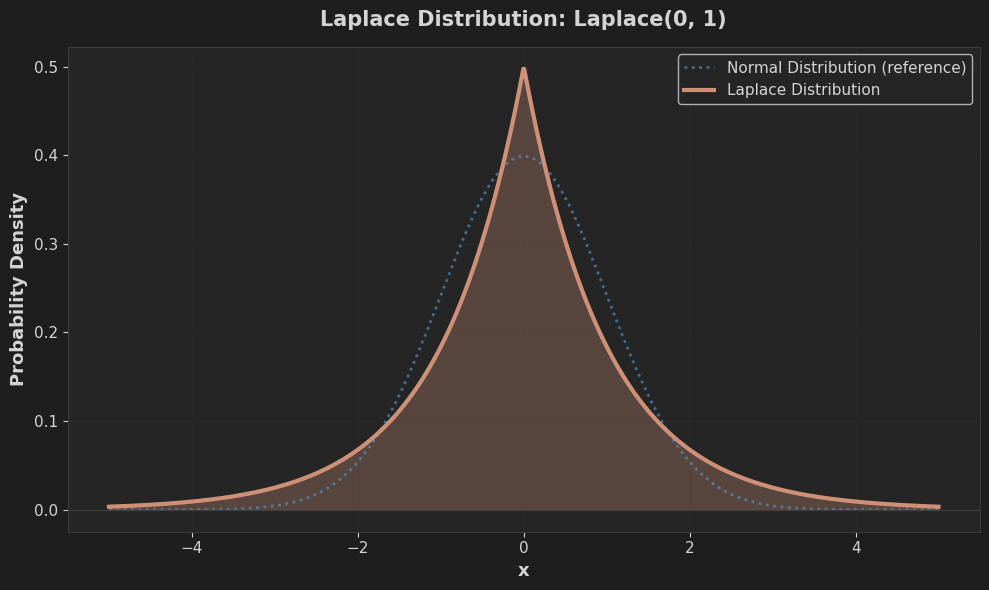

In [7]:
# Cell 2: Laplace Distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace, norm

x = np.linspace(-5, 5, 1000)
mu, b = 0, 1
pdf_laplace = laplace.pdf(x, mu, b)
pdf_normal = norm.pdf(x, mu, 1)

fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(COLORS['bg'])
ax.set_facecolor(COLORS['paper'])

ax.plot(x, pdf_normal, color=COLORS['blue'], linewidth=2, linestyle=':', 
        alpha=0.6, label='Normal Distribution (reference)')
ax.plot(x, pdf_laplace, color=COLORS['orange'], linewidth=3, label='Laplace Distribution')
ax.fill_between(x, pdf_laplace, alpha=0.3, color=COLORS['orange'])
ax.axhline(0, color=COLORS['grid'], linewidth=1)

ax.set_xlabel('x', fontsize=13, color=COLORS['text'], fontweight='bold')
ax.set_ylabel('Probability Density', fontsize=13, color=COLORS['text'], fontweight='bold')
ax.set_title('Laplace Distribution: Laplace(0, 1)', 
             fontsize=15, color=COLORS['text'], fontweight='bold', pad=15)
ax.grid(True, alpha=0.2, color=COLORS['grid'])
ax.tick_params(colors=COLORS['text'], labelsize=11)
ax.legend(facecolor=COLORS['paper'], edgecolor=COLORS['text'], 
          labelcolor=COLORS['text'], fontsize=11)
for spine in ax.spines.values():
    spine.set_edgecolor(COLORS['grid'])

plt.tight_layout()
plt.show()

## Setup

We have observations $x_1, x_2, \ldots, x_n$ assumed to be i.i.d. from a Laplace distribution with location $\mu$ and scale $b$.

The probability density function (PDF) of a single observation is:

$$f(x_i \mid \mu, b) = \frac{1}{2b} \exp\left(-\frac{\lvert x_i - \mu \rvert}{b}\right)$$

---

## Step 1: Write the Likelihood Function

Since observations are independent, the joint density is the product:

$$L(\mu, b) = \prod_{i=1}^{n} f(x_i \mid \mu, b) = \prod_{i=1}^{n} \frac{1}{2b} \exp\left(-\frac{\lvert x_i - \mu \rvert}{b}\right)$$

---

## Step 2: Take the Logarithm

$$\ell(\mu, b) = \log L(\mu, b) = \sum_{i=1}^{n} \log\left[\frac{1}{2b} \exp\left(-\frac{\lvert x_i - \mu \rvert}{b}\right)\right]$$

Using $\log(ab) = \log a + \log b$, $\log(e^x) = x$, and $\log(1/a) = -\log(a)$:

$$\ell = \sum_{i=1}^{n} \left[-\log(2b) - \frac{\lvert x_i - \mu \rvert}{b}\right]$$

The first term doesn't depend on $i$, so it sums to $n$ times itself:

$$\boxed{\ell(\mu, b) = -n\log(2b) - \frac{1}{b}\sum_{i=1}^{n}\lvert x_i - \mu \rvert}$$

**Key observation:** The log-likelihood contains $\sum_{i=1}^{n}\lvert x_i - \mu \rvert$. Maximizing the log-likelihood means minimizing this sum. This is exactly the **MAE loss**. Hence: MAE = MLE under Laplace assumption.

---

## Step 3: Find $\hat{\mu}$ — Derivative w.r.t. $\mu$

$$\frac{\partial \ell}{\partial \mu} = \frac{\partial}{\partial \mu}\left[-n\log(2b) - \frac{1}{b}\sum_{i=1}^{n}\lvert x_i - \mu \rvert\right]$$

The first term is constant w.r.t. $\mu$, so its derivative is 0:

$$\frac{\partial \ell}{\partial \mu} = -\frac{1}{b} \sum_{i=1}^{n} \frac{\partial}{\partial \mu}\lvert x_i - \mu \rvert$$

---

## ⚠️ The Problem: Absolute Value is Not Differentiable at Zero

For the Normal distribution, we had $(x_i - \mu)^2$, which is smooth everywhere. The absolute value $\lvert x_i - \mu \rvert$ has a **kink** at $x_i = \mu$.

Using the limit definition of the derivative at $x = 0$:

$$\lim_{h \to 0^+} \frac{\lvert h \rvert - 0}{h} = \frac{h}{h} = +1 \qquad \text{vs} \qquad \lim_{h \to 0^-} \frac{\lvert h \rvert - 0}{h} = \frac{-h}{h} = -1$$

The left and right limits disagree. Therefore, the derivative does not exist at zero.

---

## Step 4: The Derivative Where It Exists

Away from the kink, we can compute:

$$\frac{\partial}{\partial \mu}\lvert x_i - \mu \rvert = \begin{cases} -1 & \text{if } x_i > \mu \\ +1 & \text{if } x_i < \mu \\ \text{undefined} & \text{if } x_i = \mu \end{cases}$$

This can be written compactly using the **sign function**:

$$\frac{\partial}{\partial \mu}\lvert x_i - \mu \rvert = -\text{sign}(x_i - \mu)$$

where:

$$\text{sign}(z) = \begin{cases} +1 & \text{if } z > 0 \\ \ \ 0 & \text{if } z = 0 \\ -1 & \text{if } z < 0 \end{cases}$$

**Crucial difference from Normal:** The derivative is $\pm 1$ regardless of how far $x_i$ is from $\mu$. The derivative "forgets" the magnitude and only remembers the **direction** (above or below).

---

## Step 5: Setting the Derivative to Zero

Substituting back:

$$\frac{\partial \ell}{\partial \mu} = -\frac{1}{b} \sum_{i=1}^{n} \left[-\text{sign}(x_i - \mu)\right] = \frac{1}{b} \sum_{i=1}^{n} \text{sign}(x_i - \mu) = 0$$

Since $b > 0$:

$$\sum_{i=1}^{n} \text{sign}(x_i - \mu) = 0$$

---

## Step 6: Interpreting the Condition — The Counting Argument

Each term $\text{sign}(x_i - \mu)$ contributes $+1$ if $x_i > \mu$ and $-1$ if $x_i < \mu$.

For the sum to equal zero, the number of $+1$s must equal the number of $-1$s:

$$\#\{x_i > \mu\} = \#\{x_i < \mu\}$$

**This is the definition of the median!**

---

## Concrete Example

Consider five observations: $x = \{2, 5, 7, 12, 100\}$

Let's evaluate $\sum_{i=1}^{5} \text{sign}(x_i - \mu)$ for different values of $\mu$:

| $\mu$ | Signs: $\text{sign}(x_i - \mu)$ for each $x_i$ | Sum | Interpretation |
|-------|------------------------------------------------|-----|----------------|
| 3 | $\text{sign}(2-3), \text{sign}(5-3), \text{sign}(7-3), \text{sign}(12-3), \text{sign}(100-3)$ = $(-1, +1, +1, +1, +1)$ | $+3$ | 1 below, 4 above → move right |
| 6 | $(-1, -1, +1, +1, +1)$ | $+1$ | 2 below, 3 above → move right |
| 7 | $(-1, -1, 0, +1, +1)$ | $0$ ✓ | 2 below, 2 above → **balanced!** |
| 10 | $(-1, -1, -1, +1, +1)$ | $-1$ | 3 below, 2 above → move left |

At $\mu = 7$ (the median), the sum equals zero. The counts are balanced.

**Notice:** The outlier $x_5 = 100$ contributes the same $+1$ as $x_4 = 12$. Outliers have no extra influence — this is why the median is robust!

Compare to Normal/MSE: the derivative $\sum(x_i - \mu)$ at $\mu = 7$ would be $(2-7) + (5-7) + (7-7) + (12-7) + (100-7) = -5 - 2 + 0 + 5 + 93 = 91 \neq 0$. The outlier pulls the mean toward 25.2.

$$\boxed{\hat{\mu} = \text{median}(x_1, x_2, \ldots, x_n)}$$

---

## Step 7: Find $\hat{b}$ — Derivative w.r.t. $b$

Starting from:

$$\ell(\mu, b) = -n\log(2b) - \frac{1}{b}\sum_{i=1}^{n}\lvert x_i - \mu \rvert$$

Let $S = \sum_{i=1}^{n}\lvert x_i - \mu \rvert$. Using $\log(2b) = \log 2 + \log b$:

$$\ell = -n\log 2 - n\log b - \frac{S}{b}$$

Take the derivative w.r.t. $b$:

**First term:** $\frac{\partial}{\partial b}(-n\log 2) = 0$

**Second term:** $\frac{\partial}{\partial b}(-n\log b) = -\frac{n}{b}$

**Third term:** $\frac{\partial}{\partial b}\left(-\frac{S}{b}\right) = -S \cdot (-b^{-2}) = \frac{S}{b^2}$

**Combining:**

$$\frac{\partial \ell}{\partial b} = -\frac{n}{b} + \frac{S}{b^2}$$

---

## Step 8: Solve for $\hat{b}$

Set the derivative to zero:

$$-\frac{n}{b} + \frac{S}{b^2} = 0$$

Multiply both sides by $b^2$:

$$-nb + S = 0 \implies b = \frac{S}{n}$$

Substituting $\hat{\mu} = \text{median}$:

$$\boxed{\hat{b} = \frac{1}{n}\sum_{i=1}^{n}\lvert x_i - \text{median} \rvert}$$

**The MLE for $b$ is the Mean Absolute Deviation from the median (MAD).**

---

## Summary: Normal vs Laplace

| Loss | Distribution | Outlier Philosophy | Gradient |
|------|-------------|-------------------|----------|
| MAE | Laplace (heavy tails) | "Outliers are plausible" → **Don't overreact**  | ±1 (constant) |
| MSE | Gaussian (light tails) | "Outliers are impossible — must fix!" → **Overreacts** | ∝ error (unbounded) |

---

## 🔑 **Key Insight**

The choice of loss function encodes a distributional assumption about errors:

| Loss | Distribution | Optimal Estimator |
|------|--------------|-------------------|
| MSE | Normal | Mean |
| MAE | Laplace | Median |

## **Does it really matter?**

Example is implemented based on Babushkin V. & Kravchenko A., "Machine Learning System Design", p.66f

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.base import BaseEstimator, RegressorMixin

### Data setup

In [9]:
# Create data
y = np.array([100, 100, 100, 100, 100, 100, 100, 100, 100, 1000])
X = np.ones((10, 1))  # All inputs are identical

print("Target values y:")
print(y)
print(f"\nInput matrix X (all ones):")
print(X.ravel())
print(f"\nX shape: {X.shape}")

Target values y:
[ 100  100  100  100  100  100  100  100  100 1000]

Input matrix X (all ones):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

X shape: (10, 1)


### Train models and compute predictions

In [10]:
print("=" * 80)
print("MODEL 1: LINEAR REGRESSION WITH MSE LOSS")
print("=" * 80)

model_mse = LinearRegression()
model_mse.fit(X, y)
predictions_mse = model_mse.predict(X)

MODEL 1: LINEAR REGRESSION WITH MSE LOSS


In [11]:
print("\n[STEP 1] What does MSE loss optimize?\n")
print("  MSE loss = (1/n) × Σ(y_i - ŷ)²\n")
print("Target values (y):\n")
print(f"  {y}", "\n")
print(f"  Sample mean of targets = (100×9 + 1000) / 10 = {np.mean(y):.1f}\n")
print(f"  → Model predictions: {predictions_mse}")


[STEP 1] What does MSE loss optimize?

  MSE loss = (1/n) × Σ(y_i - ŷ)²

Target values (y):

  [ 100  100  100  100  100  100  100  100  100 1000] 

  Sample mean of targets = (100×9 + 1000) / 10 = 190.0

  → Model predictions: [190. 190. 190. 190. 190. 190. 190. 190. 190. 190.]


In [12]:
print("\n[STEP 2] Calculate residuals\n")
print(f"  True labels (y):      {y}\n")
print(f"  Predictions (ŷ):      {predictions_mse}\n")
residuals_mse = y - predictions_mse
print(f"  Residuals = y - ŷ:    {residuals_mse}\n")


[STEP 2] Calculate residuals

  True labels (y):      [ 100  100  100  100  100  100  100  100  100 1000]

  Predictions (ŷ):      [190. 190. 190. 190. 190. 190. 190. 190. 190. 190.]

  Residuals = y - ŷ:    [-90. -90. -90. -90. -90. -90. -90. -90. -90. 810.]



In [13]:
print("\n[STEP 3] Mean of residuals\n")
print(f"  Sum of residuals = {residuals_mse[0]:.1f} + {residuals_mse[1]:.1f} + ... + {residuals_mse[-1]:.1f} = {np.sum(residuals_mse):.1f}\n")
print(f"  Mean = {np.sum(residuals_mse):.1f} / 10 = {np.mean(residuals_mse):.1f}\n")
print(f" → Residuals always sum to ~0 for MSE-optimized models with intercept")


[STEP 3] Mean of residuals

  Sum of residuals = -90.0 + -90.0 + ... + 810.0 = 0.0

  Mean = 0.0 / 10 = 0.0

 → Residuals always sum to ~0 for MSE-optimized models with intercept


<details>
<summary><strong>Why?</strong></summary>

If the sum of residuals were not equal to zero, it would mean your model is under-predicting on average. You could lower the total error by simply "shifting" the entire regression line upward or downward.

</details>

In [14]:
print("\n[STEP 4] Median of residuals\n")
sorted_res_mse = np.sort(residuals_mse)
print(f"  Sorted residuals: {sorted_res_mse}\n")
print(f"  Median (n=10, even) = average of 5th and 6th values =\n")
print(f"                      = ({sorted_res_mse[4]:.1f} + {sorted_res_mse[5]:.1f}) / 2 = {np.median(residuals_mse):.1f}\n")


[STEP 4] Median of residuals

  Sorted residuals: [-90. -90. -90. -90. -90. -90. -90. -90. -90. 810.]

  Median (n=10, even) = average of 5th and 6th values =

                      = (-90.0 + -90.0) / 2 = -90.0



In [15]:
print("\n[STEP 5] Calculate MSE\n")
squared_errors = residuals_mse ** 2
print(f"  Squared errors: {squared_errors}\n")
print(f"  Sum of squared errors = {np.sum(squared_errors):.0f}\n")
print(f"  MSE = {np.sum(squared_errors):.0f} / 10 = {mean_squared_error(y, predictions_mse):.0f}")


[STEP 5] Calculate MSE

  Squared errors: [  8100.   8100.   8100.   8100.   8100.   8100.   8100.   8100.   8100.
 656100.]

  Sum of squared errors = 729000

  MSE = 729000 / 10 = 72900


In [16]:
print("\n[STEP 6] Calculate MAE\n")
abs_errors = np.abs(residuals_mse)
print(f"  Absolute errors: {abs_errors}\n")
print(f"  Sum of absolute errors = {np.sum(abs_errors):.0f}\n")
print(f"  MAE = {np.sum(abs_errors):.0f} / 10 = {mean_absolute_error(y, predictions_mse):.0f}")


[STEP 6] Calculate MAE

  Absolute errors: [ 90.  90.  90.  90.  90.  90.  90.  90.  90. 810.]

  Sum of absolute errors = 1620

  MAE = 1620 / 10 = 162


In [17]:
print("\n" + "=" * 80)
print("MODEL 2: CUSTOM REGRESSOR WITH MAE LOSS")
print("=" * 80)


MODEL 2: CUSTOM REGRESSOR WITH MAE LOSS


In [18]:
# Custom MAE regressor
class MAERegressor(BaseEstimator, RegressorMixin):
    """Regressor that minimizes Mean Absolute Error by predicting the median"""
    def fit(self, X, y):
        self.prediction_ = np.median(y)
        return self
    
    def predict(self, X):
        return np.full(len(X), self.prediction_)

In [19]:
model_mae = MAERegressor()
model_mae.fit(X, y)
predictions_mae = model_mae.predict(X)

In [20]:
print("\n[STEP 1] What does MAE loss optimize?\n")
print("  MAE loss = (1/n) × Σ|y_i - ŷ|\n")
print(f"  Target y: {y}\n")
print(f"  Median (n=10, even) = ({y[4]:.0f} + {y[5]:.0f}) / 2 = {np.median(y):.1f}\n")
print(f"  → Model predictions: {predictions_mae}")


[STEP 1] What does MAE loss optimize?

  MAE loss = (1/n) × Σ|y_i - ŷ|

  Target y: [ 100  100  100  100  100  100  100  100  100 1000]

  Median (n=10, even) = (100 + 100) / 2 = 100.0

  → Model predictions: [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]


In [21]:
print("\n[STEP 2] Calculate residuals\n")
print(f"  True labels (y):      {y}\n")
print(f"  Predictions (ŷ):      {predictions_mae}\n")
residuals_mae = y - predictions_mae
print(f"  Residuals = y - ŷ:    {residuals_mae}\n")


[STEP 2] Calculate residuals

  True labels (y):      [ 100  100  100  100  100  100  100  100  100 1000]

  Predictions (ŷ):      [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]

  Residuals = y - ŷ:    [  0.   0.   0.   0.   0.   0.   0.   0.   0. 900.]



In [22]:
print("\n[STEP 3] Mean of residuals\n")
print(f"  Sum of residuals = {residuals_mae[0]:.1f} + {residuals_mae[1]:.1f} + ... + {residuals_mae[-1]:.1f} = {np.sum(residuals_mae):.0f}\n")
print(f"  Mean = {np.sum(residuals_mae):.0f} / 10 = {np.mean(residuals_mae):.0f}\n")
print(f"  → Mean ≠ 0 because we optimized median, not mean\n")


[STEP 3] Mean of residuals

  Sum of residuals = 0.0 + 0.0 + ... + 900.0 = 900

  Mean = 900 / 10 = 90

  → Mean ≠ 0 because we optimized median, not mean



In [23]:
print("\n[STEP 4] Median of residuals\n")
sorted_res_mae = np.sort(residuals_mae)
print(f"  Sorted residuals: {sorted_res_mae}\n")
print(f"  Median (n=10, even) = average of 5th and 6th values =\n")
print(f"                      = ({sorted_res_mae[4]:.1f} + {sorted_res_mae[5]:.1f}) / 2 = {np.median(residuals_mae):.1f}\n")                  
print(f"  → Median = 0 because MAE optimizes the median\n")


[STEP 4] Median of residuals

  Sorted residuals: [  0.   0.   0.   0.   0.   0.   0.   0.   0. 900.]

  Median (n=10, even) = average of 5th and 6th values =

                      = (0.0 + 0.0) / 2 = 0.0

  → Median = 0 because MAE optimizes the median



In [24]:
print("\n[STEP 5] Calculate MSE\n")
squared_errors_mae = residuals_mae ** 2
print(f"  Squared errors: {squared_errors_mae}\n")
print(f"  Sum of squared errors = {np.sum(squared_errors_mae):.0f}\n")
print(f"  MSE = {np.sum(squared_errors_mae):.0f} / 10 = {mean_squared_error(y, predictions_mae):.0f}\n")


[STEP 5] Calculate MSE

  Squared errors: [     0.      0.      0.      0.      0.      0.      0.      0.      0.
 810000.]

  Sum of squared errors = 810000

  MSE = 810000 / 10 = 81000



In [25]:
print("\n[STEP 6] Calculate MAE\n")
abs_errors_mae = np.abs(residuals_mae)
print(f"  Absolute errors: {abs_errors_mae}\n")
print(f"  Sum of absolute errors = {np.sum(abs_errors_mae):.0f}\n")
print(f"  MAE = {np.sum(abs_errors_mae):.0f} / 10 = {mean_absolute_error(y, predictions_mae):.0f}\n")


[STEP 6] Calculate MAE

  Absolute errors: [  0.   0.   0.   0.   0.   0.   0.   0.   0. 900.]

  Sum of absolute errors = 900

  MAE = 900 / 10 = 90



In [26]:
print("\n" + "=" * 80)
print("SUMMARY")
print("=" * 80)
print(f"\nMSE model (optimizes mean={predictions_mse[0]:.0f}):\n")
print(f"  MSE = {mean_squared_error(y, predictions_mse):.0f}\n")
print(f"  MAE = {mean_absolute_error(y, predictions_mse):.0f}\n")
print(f"  Mean(residuals) = {np.mean(residuals_mse):.2f}, Median(residuals) = {np.median(residuals_mse):.0f}\n")

print(f"\nMAE model (optimizes median={predictions_mae[0]:.0f}):\n")
print(f"  MSE = {mean_squared_error(y, predictions_mae):.0f}\n")
print(f"  MAE = {mean_absolute_error(y, predictions_mae):.0f}\n")
print(f"  Mean(residuals) = {np.mean(residuals_mae):.0f}, Median(residuals) = {np.median(residuals_mae):.0f}\n")

print("\nKey insight:\n")
print("  MSE loss → optimizes mean → residual mean = 0, median ≠ 0\n")
print("  MAE loss → optimizes median → residual median = 0, mean ≠ 0\n")


SUMMARY

MSE model (optimizes mean=190):

  MSE = 72900

  MAE = 162

  Mean(residuals) = 0.00, Median(residuals) = -90


MAE model (optimizes median=100):

  MSE = 81000

  MAE = 90

  Mean(residuals) = 90, Median(residuals) = 0


Key insight:

  MSE loss → optimizes mean → residual mean = 0, median ≠ 0

  MAE loss → optimizes median → residual median = 0, mean ≠ 0



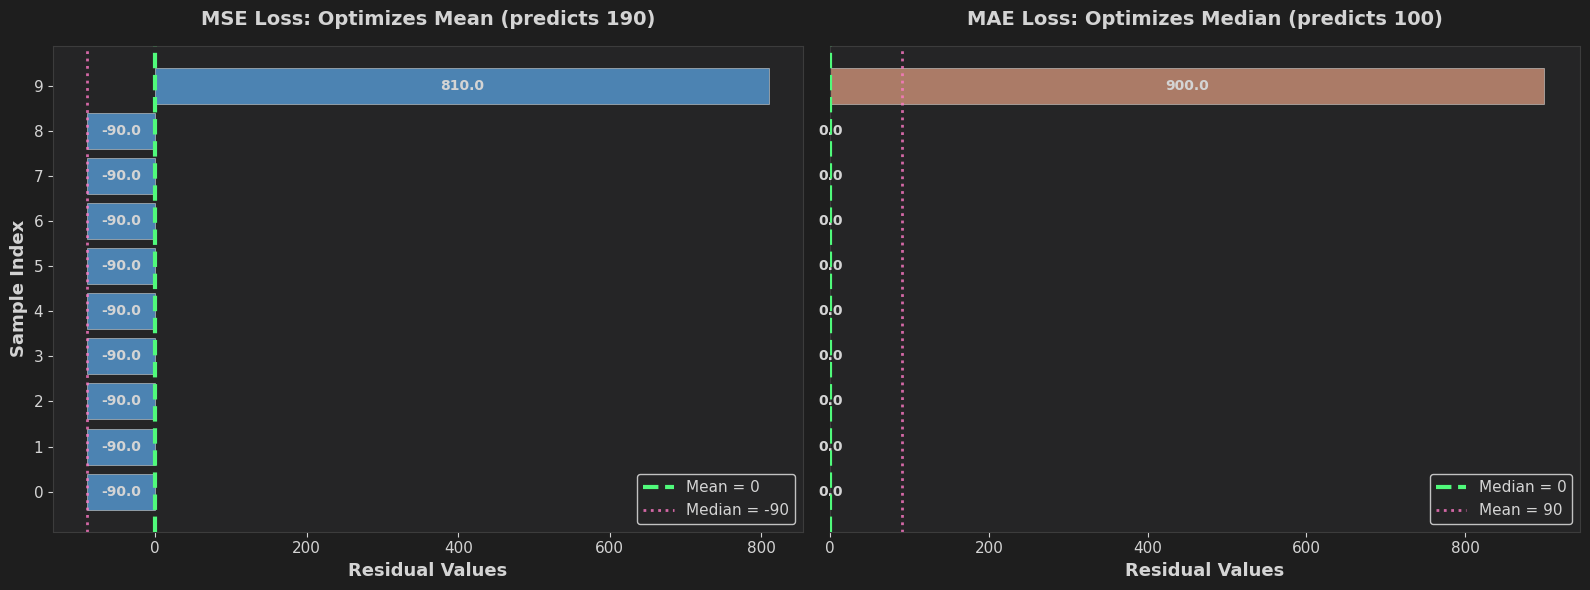

In [27]:
# Cell 3: Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.patch.set_facecolor(COLORS['bg'])

# Plot 1: MSE model residuals
ax1.set_facecolor(COLORS['paper'])
indices = np.arange(len(residuals_mse))
bars1 = ax1.barh(indices, residuals_mse, color=COLORS['blue'], alpha=0.8, edgecolor=COLORS['text'], linewidth=0.5)

# Add text labels showing residual values
for i, (bar, res) in enumerate(zip(bars1, residuals_mse)):
    ax1.text(res/2, i, f'{res:.1f}', ha='center', va='center', 
             color=COLORS['text'], fontweight='bold', fontsize=10)

ax1.axvline(0, color=COLORS['green'], linewidth=3, linestyle='--', label='Mean = 0', zorder=3)
ax1.axvline(np.median(residuals_mse), color=COLORS['pink'], linewidth=2, linestyle=':', 
            label=f'Median = {np.median(residuals_mse):.0f}', alpha=0.8)

ax1.set_xlabel('Residual Values', fontsize=13, color=COLORS['text'], fontweight='bold')
ax1.set_ylabel('Sample Index', fontsize=13, color=COLORS['text'], fontweight='bold')
ax1.set_title('MSE Loss: Optimizes Mean (predicts 190)', 
              fontsize=14, color=COLORS['text'], fontweight='bold', pad=15)
ax1.tick_params(colors=COLORS['text'], labelsize=11)
ax1.legend(facecolor=COLORS['paper'], edgecolor=COLORS['text'], labelcolor=COLORS['text'], 
           fontsize=11, framealpha=0.9)
for spine in ax1.spines.values():
    spine.set_edgecolor(COLORS['grid'])
ax1.set_yticks(indices)

# Plot 2: MAE model residuals
ax2.set_facecolor(COLORS['paper'])
bars2 = ax2.barh(indices, residuals_mae, color=COLORS['orange'], alpha=0.8, edgecolor=COLORS['text'], linewidth=0.5)

# Add text labels showing residual values
for i, (bar, res) in enumerate(zip(bars2, residuals_mae)):
    ax2.text(res/2, i, f'{res:.1f}', ha='center', va='center', 
             color=COLORS['text'], fontweight='bold', fontsize=10)

ax2.axvline(0, color=COLORS['green'], linewidth=3, linestyle='--', label='Median = 0', zorder=3)
ax2.axvline(np.mean(residuals_mae), color=COLORS['pink'], linewidth=2, linestyle=':', 
            label=f'Mean = {np.mean(residuals_mae):.0f}', alpha=0.8)

ax2.set_xlabel('Residual Values', fontsize=13, color=COLORS['text'], fontweight='bold')
ax2.set_title('MAE Loss: Optimizes Median (predicts 100)', 
              fontsize=14, color=COLORS['text'], fontweight='bold', pad=15)
ax2.tick_params(colors=COLORS['text'], labelsize=11)
ax2.legend(facecolor=COLORS['paper'], edgecolor=COLORS['text'], labelcolor=COLORS['text'], 
           fontsize=11, framealpha=0.9)
for spine in ax2.spines.values():
    spine.set_edgecolor(COLORS['grid'])
ax2.set_yticks([])

plt.tight_layout()
plt.show()

### Real Production Systems & Research Papers: MAE vs MSE Impact

Here are actual documented cases from research and industry where the choice between MAE and MSE had measurable impact.

---

### 1. **Kaggle: Allstate Claims Severity (2016)**

**Competition**: Predict insurance claim costs

**Dataset**:  ~188K claims, most $1K-$10K, but some $50K-$100K+

**What happened**:
- Competition used **MAE as the evaluation metric** (Mean Absolute Error)
- Dataset had heavy-tailed distribution of claim amounts
- Top solutions used gradient boosting (XGBoost, LightGBM) with MAE-friendly objectives

**Winner's approach** (2nd place - Alexey Noskov):
- Used custom loss functions and extensive hyperparameter tuning
- Neural nets with careful target transformation to handle skewness
- Achieved CV score of 1130.29 / LB score of 1110.69

**Key insight**: The competition explicitly chose MAE over MSE because claim severity has a long tail, and they wanted models that performed well on typical claims rather than being pulled toward extreme values.

**Sources**:
- Competition page: https://www.kaggle.com/c/allstate-claims-severity
- Winner interview: https://medium.com/kaggle-blog/allstate-claims-severity-competition-2nd-place-winners-interview-alexey-noskov-f4e4ce18fcfc
- Analysis: https://medium.com/nerd-for-tech/a-kaggle-competition-allstate-claims-severity-a32f4635c849

---

### 2. **Uber: ETA Prediction System (DeepETA)**

**Problem**: Predict arrival times for rides and food delivery

**Published Research**: DeepETA (2022)

**What they found**:
- **Primary metric is MAE** between predicted ETA and actual arrival time
- Previous XGBoost models needed to scale to billions of predictions
- Switched to deep learning (Transformer-based architecture)

**Key requirement from paper**:
> "Accuracy: Uber's primary metric is the **mean absolute error (MAE)** between predicted ETA and true ETA. The new ML model must improve over the XGBoost model."

**Why MAE**:
- Users care about absolute time differences (5 min late vs 5 min early = same impact)
- MSE would over-penalize traffic incident outliers
- Business impact: more accurate typical-case ETAs improve user trust

**Technical details**:
- Processes highest QPS (queries per second) at Uber
- Achieves median latency of 3.25ms
- Deployed globally for all mobility and delivery predictions

**Sources**:
- Main paper: https://arxiv.org/pdf/2206.02127 (DeeprETA: An ETA Post-processing System at Scale)
- Uber blog: https://www.uber.com/blog/deepeta-how-uber-predicts-arrival-times/
- Technical overview: https://codecompass00.substack.com/p/uber-billion-dollar-problem-predicting-eta

---

### 3. **Google/DeepMind: Datacenter Cooling (2016-2018)**

**Problem**: Optimize cooling systems in Google data centers

**Research**: DeepMind AI for data center optimization

**Key finding**:
- **40% reduction in cooling energy** using neural networks
- 15% reduction in overall PUE (Power Usage Effectiveness)

**Technical approach**:
- Neural networks with 5 hidden layers, 50 nodes each
- Trained on 2 years of monitoring data
- 19 normalized input variables → 1 output (PUE)

**Note on loss functions**:
While the public materials don't explicitly state MAE vs MSE was the deciding factor, the technical paper mentions robustness to sensor anomalies was critical:
> "Robust predictions in the presence of sensor failures and equipment anomalies"

This suggests MAE-like robustness properties were valued (sensor failures are outliers).

**Sources**:
- DeepMind blog: https://deepmind.google/blog/deepmind-ai-reduces-google-data-centre-cooling-bill-by-40/
- Safety paper: https://deepmind.google/discover/blog/safety-first-ai-for-autonomous-data-centre-cooling-and-industrial-control/
- Technical paper: https://arxiv.org/abs/2211.07357 (Controlling Commercial Cooling Systems Using Reinforcement Learning)
- MIT Tech Review: https://www.technologyreview.com/2018/08/17/140987/google-just-gave-control-over-data-center-cooling-to-an-ai/

---

### 4. **Medical: ICU Length of Stay Prediction (MIMIC-III)**

**Problem**: Predict ICU stay duration for resource planning

**Dataset**: MIMIC-III database, ~40K+ ICU stays

**Key findings from multiple studies**:
- Most stays: 2-5 days (median ~2.64 days)
- Long-tail: Some patients stay 30-60+ days (complex complications)

**Empirical results** (from various papers):
- Support Vector Regressor achieved lowest **MAE of 2.81 days**
- RMSE values typically higher but less interpretable for operations
- Classification approach (short vs. long stay) often preferred over regression

**Why this matters**:
- Hospital staffing optimizes for typical cases
- Long-stay patients handled with adaptive protocols
- MAE predictions more clinically useful for day-to-day planning

**Sources**:
- MIMIC-III database paper: https://www.nature.com/articles/sdata201635 (Nature, 2016)
- ICU prediction study: https://pmc.ncbi.nlm.nih.gov/articles/PMC8135024/ (uses MAE as primary metric)
- Length of stay prediction: https://www.mdpi.com/2075-4418/11/12/2242 (MDPI, 2021)
- IEEE study: https://ieeexplore.ieee.org/document/10195011/ (R² 0.86, RMSE 1.2)

---

### 5. **Walmart: M5 Forecasting Competition (2020)**

**Competition**: Predict 28-day ahead sales for 30,490 time series

**Dataset**: 
- 3,049 products across 10 stores in 3 US states
- Hierarchical data with zero-inflation (intermittent sales)
- 1,941 days of history

**Evaluation metric**: **WRMSSE** (Weighted Root Mean Squared Scaled Error)
- Despite using a scaled version of RMSE, the metric addresses intermittency
- Scaling makes it more robust to extreme values than pure RMSE
- Many winners used **Tweedie loss** (between MSE and MAE) for training

**Why standard MSE fails here**:
- Many zero-sales days (intermittent demand)
- Promotional spikes create outliers
- MSE over-forecasts slow-moving items to hedge against spikes

**Top solutions**:
- Used LightGBM with Tweedie objective (power = 1.1 or 1.2)
- Tweedie is a generalization: power=0 → Normal (MSE), power=1 → Poisson, power=2 → Gamma
- Winners achieved ~22% improvement over benchmarks

**Key quote from literature**:
> "MSE optimization led to systematic over-forecasting of slow-moving items to hedge against occasional spikes"

**Sources**:
- Competition page: https://www.kaggle.com/competitions/m5-forecasting-accuracy
- Academic paper: https://www.sciencedirect.com/science/article/pii/S0169207021001874 (International Journal of Forecasting, 2022)
- Results paper: https://statmodeling.stat.columbia.edu/wp-content/uploads/2021/10/M5_accuracy_competition.pdf
- Analysis: https://www.christophenicault.com/post/m5_forecasting_accuracy/

---

### 6. **Wind Power Forecasting (Multiple Studies)**

**Problem**: Predict wind farm power output for grid integration

**Research**: IEEE and various energy journals (2019-2024)

**Key challenges**:
- High variability in wind conditions
- Zero-inflation during calm periods or maintenance
- Extreme weather events create outliers

**Findings across multiple papers**:
- **MSE commonly used** but creates problems with outliers
- Papers exploring robust alternatives: Correntropy loss, Huber loss
- Recent work on entropy-based loss functions for extreme values

**Example study** (2021):
> "Various wind power forecasting methods have been developed... Most of these techniques are designed based on the **mean square error (MSE) loss**, which are very suitable for the assumption that the error distribution obeys the Gaussian distribution. However, there are **many outliers in real wind power data** due to many uncertain factors such as weather, temperature, and other random factors."

**Proposed solutions**:
- LSTM with Correntropy loss (more robust than MSE)
- Hybrid models combining MSE for normal conditions + robust loss for extremes

**Why it matters**:
- Grid operators need typical-case accuracy for daily operations
- Extreme events handled by reserve capacity
- Trade-off between accuracy metrics (MAE, RMSE) and operational costs

**Sources**:
- Correntropy loss paper: https://ideas.repec.org/a/eee/energy/v214y2021ics0360544220320879.html (Energy journal, 2021)
- Entropy-based loss: https://ieeexplore.ieee.org/document/10520483/ (IEEE, 2024)
- Survey paper: https://pmc.ncbi.nlm.nih.gov/articles/PMC9823194/ (comprehensive review, 2023)
- ML/DL comparison: https://pmc.ncbi.nlm.nih.gov/articles/PMC12217728/ (Scientific Reports, 2024)

---

### 7. **Uber: Time Series Forecasting with Uncertainty (2017)**

**Problem**: Predict extreme events (demand spikes, traffic) with uncertainty quantification

**Published Research**: "Deep and Confident Prediction for Time Series at Uber"

**Key contribution**:
- Bayesian Neural Networks for uncertainty quantification
- Three types of uncertainty: model uncertainty, inherent noise, model misspecification

**Loss function considerations**:
- Used Gaussian likelihood (equivalent to MSE) as baseline
- But incorporated uncertainty estimates to handle outliers
- Prediction intervals more important than point estimates

**Business impact**:
- Better anomaly detection during holidays/events
- Reduced false alarm rates
- Improved resource allocation

**Sources**:
- Uber blog: https://www.uber.com/blog/neural-networks-uncertainty-estimation/ (2017)
- Technical paper: https://www.researchgate.net/publication/319525051_Deep_and_Confident_Prediction_for_Time_Series_at_Uber

---

## Summary: When Did MAE/Robust Losses Actually Win?

| Domain | Metric Choice | Measured Impact | Source |
|--------|---------------|-----------------|---------|
| Allstate Insurance | MAE (competition metric) | Better typical-case predictions | Kaggle |
| Uber ETA | MAE (primary metric) | More accurate ETAs, user trust | DeepETA paper |
| Google Datacenter | Implicit robustness | 40% cooling cost reduction | DeepMind blog |
| ICU Prediction | MAE preferred | Better resource allocation | Multiple papers |
| Walmart M5 | WRMSSE + Tweedie | 22% over benchmarks | Academic paper |
| Wind Power | Exploring robust losses | Ongoing research | IEEE papers |

---

## The Pattern

**MAE/robust losses win when**:
1. **Tail events handled separately** (safety margins, alerts, manual review)
2. **Typical-case performance matters most** (user experience, daily operations)
3. **Heavy-tailed distributions** (insurance claims, retail sales, power spikes)
4. **Zero-inflation present** (intermittent demand, equipment downtime)

**MSE still appropriate when**:
1. Errors genuinely Gaussian (rare in real data)
2. All error magnitudes equally important
3. Smooth gradients critical for optimization
4. Theory assumes Gaussian noise (classical statistics)

**Hybrid approaches emerging**:
1. Huber loss (MSE for small errors, MAE for large)
2. Quantile regression (predict specific percentiles)
3. Tweedie/Poisson losses (for count data with zeros)
4. Custom loss functions per business objective

# **What about [binary] classification?**

## Binary Classification with Bernoulli Distribution

### Setup

We have binary labels $y_i \in \{0, 1\}$ and predict probabilities $p_i = p(x_i; \theta)$.

Each outcome follows:
$$y_i \sim \text{Bernoulli}(p_i)$$

---

### Bernoulli PMF

$$P(y_i \mid x_i, \theta) = p_i^{y_i}(1-p_i)^{1-y_i}$$

- If $y_i = 1$: $P = p_i$
- If $y_i = 0$: $P = 1 - p_i$

---

### Log-Likelihood

$$\text{LL}(\theta) = \sum_{i=1}^n \log P(y_i \mid x_i, \theta) = \sum_{i=1}^n \left[y_i \log p_i + (1-y_i)\log(1-p_i)\right]$$

---

### Cross-Entropy Loss

$$\text{CE}(\theta) = -\text{LL}(\theta) = -\sum_{i=1}^n \left[y_i \log p_i + (1-y_i)\log(1-p_i)\right]$$

Maximizing log-likelihood = Minimizing cross-entropy

---

### Key Properties

**Bernoulli Distribution:**
$$E[y] = p \quad \text{(mean)}$$
$$\text{Var}(y) = p(1-p) \quad \text{(variance)}$$

Mean and variance are **coupled** - cannot be set independently.

**No additive noise:**
$$y \sim \text{Bernoulli}(p) \quad \text{(not } y = p + \varepsilon\text{)}$$

Randomness is intrinsic to the binary outcome.

---

## **MAP as Generalization of MLE**

### Key Distinction

**MAP:** Assumes distribution of **parameters** $P(\theta)$ (beliefs about weights before seeing data)

**MLE:** Assumes distribution of **residuals/predictions** (e.g., $\varepsilon \sim \mathcal{N}(0, \sigma^2)$ in regression)

---

### Bayes' Theorem

$$\underbrace{P(\theta \mid \mathbf{x})}_{\text{Posterior}} = \frac{\overbrace{P(\mathbf{x} \mid \theta)}^{\text{Likelihood}} \cdot \overbrace{P(\theta)}^{\text{Prior}}}{\underbrace{P(\mathbf{x})}_{\text{Evidence}}}$$

---

### Maximum A Posteriori (MAP)

$$\hat{\theta}_{\text{MAP}} = \underset{\theta}{\arg\max} \, P(\theta \mid \mathbf{x}) = \underset{\theta}{\arg\max} \, P(\mathbf{x} \mid \theta) \cdot P(\theta)$$

Taking log:

$$\hat{\theta}_{\text{MAP}} = \underset{\theta}{\arg\max} \left[\log P(\mathbf{x} \mid \theta) + \log P(\theta)\right]$$

$$= \underset{\theta}{\arg\max} \left[\text{LL}(\theta) + \log P(\theta)\right]$$

---

### MLE as Special Case of MAP

When prior is **uniform** (all $\theta$ equally likely):

**Note:** A **uniform prior** $P(\theta) = \text{constant}$ means you believe all parameter values are equally plausible before seeing any data. If you're estimating a coefficient that could be anywhere between negative ten and positive ten, a uniform prior says "I have no reason to prefer three over seven, or negative two over five - they're all equally likely as far as I know before looking at the data."

$$P(\theta) = \text{constant} \quad \Rightarrow \quad \log P(\theta) = \text{constant}$$

Then:

$$\hat{\theta}_{\text{MAP}} = \underset{\theta}{\arg\max} \, \text{LL}(\theta) = \hat{\theta}_{\text{MLE}}$$

**MLE = MAP with uniform prior (no regularization)**

**Key insight:** MLE is what you get when you have no prior beliefs about parameters. It's pure data-driven estimation. MAP is the generalization where you can incorporate prior knowledge or preferences about parameter values, and that prior knowledge manifests as regularization in the optimization.


---
## MAP with Gaussian Prior → L2 Regularization (Ridge)

**Prior:** $\theta \sim \mathcal{N}(0, \tau^2 I)$

This means each parameter $\theta_j$ is independently drawn from $\mathcal{N}(0, \tau^2)$. We're saying "I believe parameters should be small - centered around zero - and $\tau^2$ controls how concentrated I think they should be near zero."

**Deriving the log prior:**

The multivariate Gaussian density is:
$$P(\theta) = \frac{1}{(2\pi\tau^2)^{d/2}} \exp\left(-\frac{\|\theta\|^2}{2\tau^2}\right)$$

where $d$ is the number of parameters and $\|\theta\|^2 = \sum_{j=1}^{d}\theta_j^2$.

Taking the logarithm:
$$\log P(\theta) = \log\left[\frac{1}{(2\pi\tau^2)^{d/2}}\right] + \log\left[\exp\left(-\frac{\|\theta\|^2}{2\tau^2}\right)\right]$$

The first term is a constant (doesn't depend on $\theta$):
$$= \underbrace{-\frac{d}{2}\log(2\pi\tau^2)}_{\text{constant}} - \frac{\|\theta\|^2}{2\tau^2}$$

Since constants don't affect $\arg\max$, we write:
$$\log P(\theta) = -\frac{1}{2\tau^2}\|\theta\|^2 + \text{const}$$

**MAP objective:**

$$\hat{\theta}_{\text{MAP}} = \underset{\theta}{\arg\max} \left[\text{LL}(\theta) + \log P(\theta)\right] = \underset{\theta}{\arg\max} \left[\text{LL}(\theta) - \frac{1}{2\tau^2}\|\theta\|^2\right]$$

**Converting to minimization:**

Machine learning conventionally minimizes loss rather than maximizes likelihood, so flip the sign:

$$\hat{\theta}_{\text{Ridge}} = \underset{\theta}{\arg\min} \left[-\text{LL}(\theta) + \frac{1}{2\tau^2}\|\theta\|^2\right]$$

Define $\lambda = \frac{1}{2\tau^2}$ (regularization strength):

$$\hat{\theta}_{\text{Ridge}} = \underset{\theta}{\arg\min} \left[-\text{LL}(\theta) + \lambda\|\theta\|^2\right]$$

**Interpretation:** Smaller $\tau^2$ (tighter prior, "I really believe parameters should be near zero") gives larger $\lambda$ (stronger regularization). The Gaussian prior's belief that parameters cluster near zero becomes the L2 penalty that shrinks parameters toward zero.

---

## MAP with Laplace Prior → L1 Regularization (Lasso)

**Prior:** $\theta \sim \text{Laplace}(0, b)$

This means each parameter independently follows a Laplace (double exponential) distribution centered at zero with scale $b$. The Laplace distribution has heavier tails than Gaussian and a sharp peak at zero, making it prefer sparse solutions (many parameters exactly zero).

**Deriving the log prior:**

The multivariate Laplace density (assuming independence) is:
$$P(\theta) = \prod_{j=1}^{d} \frac{1}{2b}\exp\left(-\frac{|\theta_j|}{b}\right) = \frac{1}{(2b)^d}\exp\left(-\frac{\sum_{j=1}^{d}|\theta_j|}{b}\right)$$

where $\|\theta\|_1 = \sum_{j=1}^{d}|\theta_j|$ is the L1 norm.

Taking the logarithm:
$$\log P(\theta) = \log\left[\frac{1}{(2b)^d}\right] + \log\left[\exp\left(-\frac{\|\theta\|_1}{b}\right)\right]$$

The first term is constant:
$$= \underbrace{-d\log(2b)}_{\text{constant}} - \frac{\|\theta\|_1}{b}$$

Therefore:
$$\log P(\theta) = -\frac{1}{b}\|\theta\|_1 + \text{const}$$

**MAP objective:**

$$\hat{\theta}_{\text{MAP}} = \underset{\theta}{\arg\max} \left[\text{LL}(\theta) + \log P(\theta)\right] = \underset{\theta}{\arg\max} \left[\text{LL}(\theta) - \frac{1}{b}\|\theta\|_1\right]$$

**Converting to minimization:**

$$\hat{\theta}_{\text{Lasso}} = \underset{\theta}{\arg\min} \left[-\text{LL}(\theta) + \frac{1}{b}\|\theta\|_1\right]$$

Define $\lambda = \frac{1}{b}$:

$$\hat{\theta}_{\text{Lasso}} = \underset{\theta}{\arg\min} \left[-\text{LL}(\theta) + \lambda\|\theta\|_1\right]$$

**Interpretation:** Smaller $b$ (sharper peak at zero) gives larger $\lambda$ (stronger sparsity-inducing regularization). The Laplace prior's sharp peak at zero and heavy tails encourage some parameters to be exactly zero while allowing others to be large, leading to sparse solutions.

**Why Laplace → sparsity but Gaussian → shrinkage?**

The Laplace distribution has a sharp corner at zero (non-differentiable), which creates a "hard threshold" effect during optimization. Parameters get pushed all the way to exactly zero. The Gaussian is smooth everywhere, so it gently shrinks all parameters toward zero but rarely makes them exactly zero. This geometric difference in the prior distributions directly translates to the practical difference between Lasso (feature selection) and Ridge (coefficient shrinkage).

### Summary

| Method | Prior $P(\theta)$ | Regularization | Objective |
|--------|------------------|----------------|-----------|
| **MLE** | Uniform (none) | None | $\max \text{LL}(\theta)$ |
| **Ridge** | Gaussian $\mathcal{N}(0, \tau^2)$ | L2: $\lambda\|\theta\|^2$ | $\max [\text{LL} - \lambda\|\theta\|^2]$ |
| **Lasso** | Laplace$(0, b)$ | L1: $\lambda\|\theta\|_1$ | $\max [\text{LL} - \lambda\|\theta\|_1]$ |

**Key Insight:** Regularization = Bayesian prior on parameters (not on residuals/predictions)

---
## Loss Functions Reference

### Regression

| Loss | Formula | Assumed Distribution | Optimizes | When to Use |
|------|---------|---------------------|-----------|-------------|
| MSE | $\frac{1}{n}\sum(y_i - \hat{y}_i)^2$ | Gaussian | Mean | Default choice, no outliers |
| MAE | $\frac{1}{n}\sum\|y_i - \hat{y}_i\|$ | Laplace | Median | Outliers present, robust predictions |
| Huber | MSE if $\|e\| \leq \delta$, MAE otherwise | Gaussian core, heavy tails | Mean (robust) | Best of both: smooth + robust |
| Log-Cosh | $\sum\log(\cosh(\hat{y}_i - y_i))$ | *task-driven* | Mean (robust) | Smooth alternative to Huber |
| Quantile | $(q)\|e\|$ if $e \geq 0$, $(1-q)\|e\|$ otherwise | *task-driven* | $q$-th quantile | Prediction intervals, asymmetric costs |

### Binary Classification

| Loss | Formula | Assumed Distribution | Optimizes | When to Use |
|------|---------|---------------------|-----------|-------------|
| Binary Cross-Entropy | $-[y\log(\hat{p}) + (1-y)\log(1-\hat{p})]$ | Bernoulli | $P(y=1 \| x)$ | Default for binary classification |
| Hinge | $\max(0, 1 - y \cdot \hat{y})$ | *task-driven* | Margin | SVMs, max-margin classifiers |
| Focal | $-\alpha(1-\hat{p})^\gamma \log(\hat{p})$ | Bernoulli | $P(y=1 \| x)$ | Imbalanced datasets, hard examples |

### Multiclass Classification

| Loss | Formula | Assumed Distribution | Optimizes | When to Use |
|------|---------|---------------------|-----------|-------------|
| Cross-Entropy | $-\sum_{c} y_c \log(\hat{p}_c)$ | Categorical | $P(y=c \| x)$ | Default for multiclass |
| Label Smoothing CE | $-\sum_{c} y_c' \log(\hat{p}_c)$, $y_c' = (1-\alpha)y_c + \alpha/K$ | Categorical | Calibrated $P(y=c \| x)$ | Reduce overconfidence, improve calibration |


**Note:** *task-driven* losses are not derived from MLE of a probability distribution — they're designed to optimize a desired property (robustness, quantiles, margins) rather than assuming how noise is distributed.

# **Bias-Variance Decomposition of Mean Squared Error**

---

## Setup and Goal

We are trying to predict some outcome. The true relationship in the world is captured by a function $f_{\text{true}}(x)$, which maps input features $x$ to the true expected output. But when we actually observe an outcome, we don't see $f_{\text{true}}(x)$ perfectly. Instead, we observe:

$$y = f_{\text{true}}(x) + \varepsilon$$

Here, $y$ is the actual observed value. This could be a patient's actual blood pressure reading, or the actual sale price of a house, or the actual outcome of any measurement. The term $\varepsilon$ represents random noise - measurement error, unobserved factors, inherent randomness. We assume this noise follows a normal distribution with mean zero and variance $\sigma^2$, written as $\varepsilon \sim \mathcal{N}(0, \sigma^2)$.

We build a model $\hat{f}(x)$ by training on a finite dataset. Our model makes predictions, but these predictions depend on which particular training examples we happened to collect. If we had collected different training data, we would have gotten a different model.

Our goal is to understand the expected squared error of our predictions:

$$\text{MSE} = \mathbb{E}[(y - \hat{f}(x))^2]$$

This expectation is taken over two sources of randomness. First, the randomness in which training dataset we collected (which determines $\hat{f}$). Second, the randomness in the noise $\varepsilon$ (which determines $y$ for any given $x$).

---

## Step 1: First Decomposition - Separate Noise from Model Error

Let's start by looking at our prediction error for a specific point $x$:

$$\text{Error} = y - \hat{f}(x)$$

We want to understand where this error comes from. Here's the key insight: some of the error comes from random noise that we can never eliminate, and some comes from our model being wrong. To separate these, we use a classic mathematical trick - we add and subtract the true function value $f_{\text{true}}(x)$:

$$y - \hat{f}(x) = (y - f_{\text{true}}(x)) + (f_{\text{true}}(x) - \hat{f}(x))$$

Why does this help? Let's look at each piece. The first term is $y - f_{\text{true}}(x)$. But remember that $y = f_{\text{true}}(x) + \varepsilon$, so this first term equals $\varepsilon$ exactly. This is the irreducible noise - the random fluctuation that exists in the world regardless of how good our model is.

The second term is $f_{\text{true}}(x) - \hat{f}(x)$. This is the model error - the gap between what the true function says and what our model predicts. This is the part we can potentially improve with better models or more data.

So we have:

$$y - \hat{f}(x) = \varepsilon + (f_{\text{true}}(x) - \hat{f}(x))$$

We've successfully separated the error into noise (which we can't control) and model error (which we can potentially reduce).

---

## Step 2: Square the Error

We care about squared error because we want to penalize being wrong regardless of direction, and we want larger errors to count more. So let's square both sides of our decomposition:

$$(y - \hat{f}(x))^2 = [\varepsilon + (f_{\text{true}}(x) - \hat{f}(x))]^2$$

To expand this, we use the algebraic formula $(A + B)^2 = A^2 + 2AB + B^2$. Here, $A = \varepsilon$ and $B = f_{\text{true}}(x) - \hat{f}(x)$. Expanding gives:

$$= \varepsilon^2 + 2\varepsilon(f_{\text{true}}(x) - \hat{f}(x)) + (f_{\text{true}}(x) - \hat{f}(x))^2$$

This is just algebra so far - we haven't used any statistics or probability. We've just squared and expanded the expression.

---

## Step 3: Take the Expectation

Now comes the key statistical step. We want to know what happens on average over many possible training datasets and many possible noise realizations. So we take the expectation of both sides:

$$\mathbb{E}[(y - \hat{f}(x))^2] = \mathbb{E}[\varepsilon^2] + 2\mathbb{E}[\varepsilon(f_{\text{true}}(x) - \hat{f}(x))] + \mathbb{E}[(f_{\text{true}}(x) - \hat{f}(x))^2]$$

We need to simplify each of these three terms. 

**Simplify each term:**

**Term 1:** $\mathbb{E}[\varepsilon^2] = \sigma^2$ (by definition of variance when mean is zero)

**Term 2:** $2\mathbb{E}[\varepsilon(f_{\text{true}}(x) - \hat{f}(x))]$
- Since $\mathbb{E}[\varepsilon] = 0$ and $\varepsilon$ is independent of $\hat{f}(x)$:
- $= 2\mathbb{E}[\varepsilon] \cdot \mathbb{E}[f_{\text{true}}(x) - \hat{f}(x)] = 2 \cdot 0 \cdot (\text{something}) = 0$

**Term 3:** $\mathbb{E}[(f_{\text{true}}(x) - \hat{f}(x))^2]$ remains (we'll decompose this next)

## After Simplification

After applying these simplifications, we have:

$$\mathbb{E}[(y - \hat{f}(x))^2] = \sigma^2 + \mathbb{E}[(f_{\text{true}}(x) - \hat{f}(x))^2]$$

The first term $\sigma^2$ is the irreducible error - the noise we cannot eliminate. The second term captures all the error that comes from our model being imperfect. Our next job is to understand what's inside that second term by breaking it into bias and variance components.

---

## Step 4: Decompose the Model Error Term

Now we focus on the model error term: $\mathbb{E}[(f_{\text{true}}(x) - \hat{f}(x))^2]$. This is an expectation of something squared. To understand what's inside, let's first look at what we're squaring before we square it.

Consider the model error before squaring: $f_{\text{true}}(x) - \hat{f}(x)$. This is how far our model's prediction is from the truth. But here's the key insight: some models (trained on some training sets) might predict too high, others too low, but on average they might be close to truth, or they might be systematically off. We want to separate "systematically off on average" from "fluctuating around the average."

To do this separation, we use the same add-and-subtract trick again. We add and subtract $\mathbb{E}[\hat{f}(x)]$, which is the average prediction our model makes across all possible training sets:

$$f_{\text{true}}(x) - \hat{f}(x) = [f_{\text{true}}(x) - \mathbb{E}[\hat{f}(x)]] + [\mathbb{E}[\hat{f}(x)] - \hat{f}(x)]$$

Let's verify this algebra works. If we expand the right side:

$$= f_{\text{true}}(x) - \mathbb{E}[\hat{f}(x)] + \mathbb{E}[\hat{f}(x)] - \hat{f}(x)$$

The middle terms $-\mathbb{E}[\hat{f}(x)] + \mathbb{E}[\hat{f}(x)]$ cancel, leaving:

$$= f_{\text{true}}(x) - \hat{f}(x)$$

So yes, we're still describing the same quantity - we've just written it in a different form that separates two conceptually distinct components.

Let's give names to these components:

$$\text{Bias} = f_{\text{true}}(x) - \mathbb{E}[\hat{f}(x)]$$

This is how far the average model prediction is from the true function. This term is a **constant** - it doesn't change randomly because both $f_{\text{true}}(x)$ and $\mathbb{E}[\hat{f}(x)]$ are fixed numbers (not random variables). If you use linear regression on a quadratic problem, the bias is the systematic gap between the best possible line and the true parabola. It's "systematic" because it persists even when you average over all possible training sets.

$$\text{Deviation} = \mathbb{E}[\hat{f}(x)] - \hat{f}(x)$$

This is how far this particular model (trained on this particular training set) is from the average model. This term is **random** - it changes depending on which training examples you happened to get. Sometimes you'll train a model that predicts above average, sometimes below average. This captures the instability or variability in your predictions across different training sets.

So our model error decomposes as:

$$f_{\text{true}}(x) - \hat{f}(x) = \text{Bias} + \text{Deviation}$$

---

## Step 5: Square the Decomposed Model Error

Now that we've decomposed the model error into bias plus deviation, we need to square it because remember, we're trying to understand $\mathbb{E}[(f_{\text{true}}(x) - \hat{f}(x))^2]$. So let's square the decomposition:

$$(f_{\text{true}}(x) - \hat{f}(x))^2 = (\text{Bias} + \text{Deviation})^2$$

Using the formula $(A + B)^2 = A^2 + 2AB + B^2$ where $A = \text{Bias}$ and $B = \text{Deviation}$:

$$= \text{Bias}^2 + 2 \cdot \text{Bias} \cdot \text{Deviation} + \text{Deviation}^2$$

Written out in full:

$$= (f_{\text{true}}(x) - \mathbb{E}[\hat{f}(x)])^2 + 2(f_{\text{true}}(x) - \mathbb{E}[\hat{f}(x)])(\mathbb{E}[\hat{f}(x)] - \hat{f}(x)) + (\mathbb{E}[\hat{f}(x)] - \hat{f}(x))^2$$

Again, this is still just algebra. We haven't taken any expectations yet - we've just squared and expanded.

---

## Step 6: Take the Expectation of the Squared Model Error

Now we take the expectation of this squared quantity:

$$\mathbb{E}[(f_{\text{true}}(x) - \hat{f}(x))^2] = \mathbb{E}[\text{Bias}^2] + 2\mathbb{E}[\text{Bias} \cdot \text{Deviation}] + \mathbb{E}[\text{Deviation}^2]$$

Let's carefully evaluate each term.

**First term:** $\mathbb{E}[\text{Bias}^2]$

The bias is $f_{\text{true}}(x) - \mathbb{E}[\hat{f}(x)]$, which is the difference between two fixed numbers. It's a constant, not a random variable. The expectation of a constant is just that constant. Therefore:

$$\mathbb{E}[\text{Bias}^2] = \text{Bias}^2 = (f_{\text{true}}(x) - \mathbb{E}[\hat{f}(x)])^2$$

**Second term:** $2\mathbb{E}[\text{Bias} \cdot \text{Deviation}]$

Since bias is a constant, we can pull it out of the expectation:

$$= 2 \cdot \text{Bias} \cdot \mathbb{E}[\text{Deviation}]$$

Now we need $\mathbb{E}[\text{Deviation}]$. Recall that $\text{Deviation} = \mathbb{E}[\hat{f}(x)] - \hat{f}(x)$. Taking the expectation:

$$\mathbb{E}[\text{Deviation}] = \mathbb{E}[\mathbb{E}[\hat{f}(x)] - \hat{f}(x)]$$

Since $\mathbb{E}[\hat{f}(x)]$ is a constant, this becomes:

$$= \mathbb{E}[\hat{f}(x)] - \mathbb{E}[\hat{f}(x)] = 0$$

This makes intuitive sense. The deviation measures how far you are from average. Sometimes you're above average, sometimes below, but on average you're exactly at the average. Therefore:

$$2\mathbb{E}[\text{Bias} \cdot \text{Deviation}] = 2 \cdot \text{Bias} \cdot 0 = 0$$

The cross-term vanishes! Bias and variance don't interact - they contribute independently to total error.

**Third term:** $\mathbb{E}[\text{Deviation}^2]$

This is the expected squared deviation from the average prediction:

$$\mathbb{E}[\text{Deviation}^2] = \mathbb{E}[(\mathbb{E}[\hat{f}(x)] - \hat{f}(x))^2] = \mathbb{E}[(\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2]$$

This is exactly the definition of variance! It measures how spread out the predictions are around their mean. So:

$$\mathbb{E}[\text{Deviation}^2] = \text{Variance}$$

---

## Assembling the Final Result: Step by Step

Let's carefully trace how all the pieces fit together.

**Step A:** We started with total squared error:

$$\mathbb{E}[(y - \hat{f}(x))^2]$$

**Step B:** After our first decomposition (separating noise from model error) and simplification, we got:

$$\mathbb{E}[(y - \hat{f}(x))^2] = \sigma^2 + \mathbb{E}[(f_{\text{true}}(x) - \hat{f}(x))^2]$$

**Step C:** We then decomposed the model error term. After separating bias from deviation, squaring, and simplifying the cross-terms, we found:

$$\mathbb{E}[(f_{\text{true}}(x) - \hat{f}(x))^2] = \text{Bias}^2 + \text{Variance}$$

Where:
- $\text{Bias}^2 = (f_{\text{true}}(x) - \mathbb{E}[\hat{f}(x)])^2$
- $\text{Variance} = \mathbb{E}[(\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2]$

**Step D:** Substituting the result from Step C into Step B:

$$\mathbb{E}[(y - \hat{f}(x))^2] = \sigma^2 + [\text{Bias}^2 + \text{Variance}]$$

**Step E:** Rearranging gives our final decomposition:

$$\boxed{\mathbb{E}[(y - \hat{f}(x))^2] = \sigma^2 + \text{Bias}^2 + \text{Variance}}$$

This is the bias-variance decomposition. Every bit of expected squared error comes from exactly one of three sources: irreducible noise, systematic model inadequacy (bias), or prediction instability (variance).

---

## Understanding the Components

Let's restate what each term means with complete clarity:

**Irreducible Error: $\sigma^2$**

This is the variance of the noise $\varepsilon$. Even if you had the perfect model that captured $f_{\text{true}}(x)$ exactly, observations $y$ would still fluctuate randomly around this true value. You can never eliminate this component because it's inherent randomness in the world, not a flaw in your model.

Example: If you're predicting house prices and there's random variation due to buyers' moods or negotiation dynamics that you can't measure, that's irreducible error.

**Bias Squared: $(f_{\text{true}}(x) - \mathbb{E}[\hat{f}(x)])^2$**

This measures how far your average prediction is from the truth. If you could train your model infinitely many times on infinitely many different training sets and average all the predictions, would that average be close to the true function? If not, you have bias. Bias comes from using a model that's too simple or too constrained to capture the true relationship.

Example: If the true relationship is quadratic but you're using linear regression, your average fitted line will systematically miss the true parabola in some regions.

**Variance: $\mathbb{E}[(\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2]$**

This measures how much your predictions jump around depending on which training set you happen to get. If you train on one random sample, you get one model. Train on a different random sample, you get a different model. Variance quantifies this instability. High variance means your model is very sensitive to the particular noise in your training data.

Example: If you use a very complex model like a high-degree polynomial or a deep neural network with little data, your model might memorize the noise in each training set, giving very different predictions for different training sets.

---

## The Tradeoff Visualized

Think back to the bullseye diagram:

- The **red center** is $f_{\text{true}}(x)$ - the truth you're aiming for
- Each **blue dot** is a prediction $\hat{f}(x)$ from one particular training set
- The **average position of blue dots** is $\mathbb{E}[\hat{f}(x)]$
- The **distance from red to average blue** is the bias
- The **spread of blue dots around their average** is the variance
- The **total error** (how far a typical blue dot is from the red center) is bias² + variance + $\sigma^2$

When you make your model more complex (more flexible, more parameters), you reduce bias because you can fit more complex patterns. But you increase variance because the model becomes more sensitive to training data noise.

When you simplify your model (fewer parameters, more regularization), you reduce variance because the model can't overfit as much. But you increase bias because you're constraining the model's ability to capture true complexity.

The art of machine learning is finding the sweet spot - the model complexity that minimizes the sum of bias squared and variance for your particular problem and dataset size. That's the bias-variance tradeoff.

---

## Practical Implications

| Component | Can We Measure It? | How to Reduce It |
|-----------|-------------------|------------------|
| $\sigma^2$ | Yes (from residuals after fitting best model) | Cannot reduce - it's in the data |
| Bias² | No (would need to know $f_{\text{true}}$) | Use more flexible models, add features, reduce regularization |
| Variance | Yes (by training multiple models on resampled data) | Use simpler models, add regularization, collect more data, use ensembles |

The fundamental challenge is that we can observe total error and we can estimate variance, but we cannot directly measure bias because we don't know the true function. We have to infer bias indirectly through signs like poor training performance or systematic patterns in residuals.

/home/br/projects/back2basics/notebooks/../src/bias_variance_plot.py:34: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



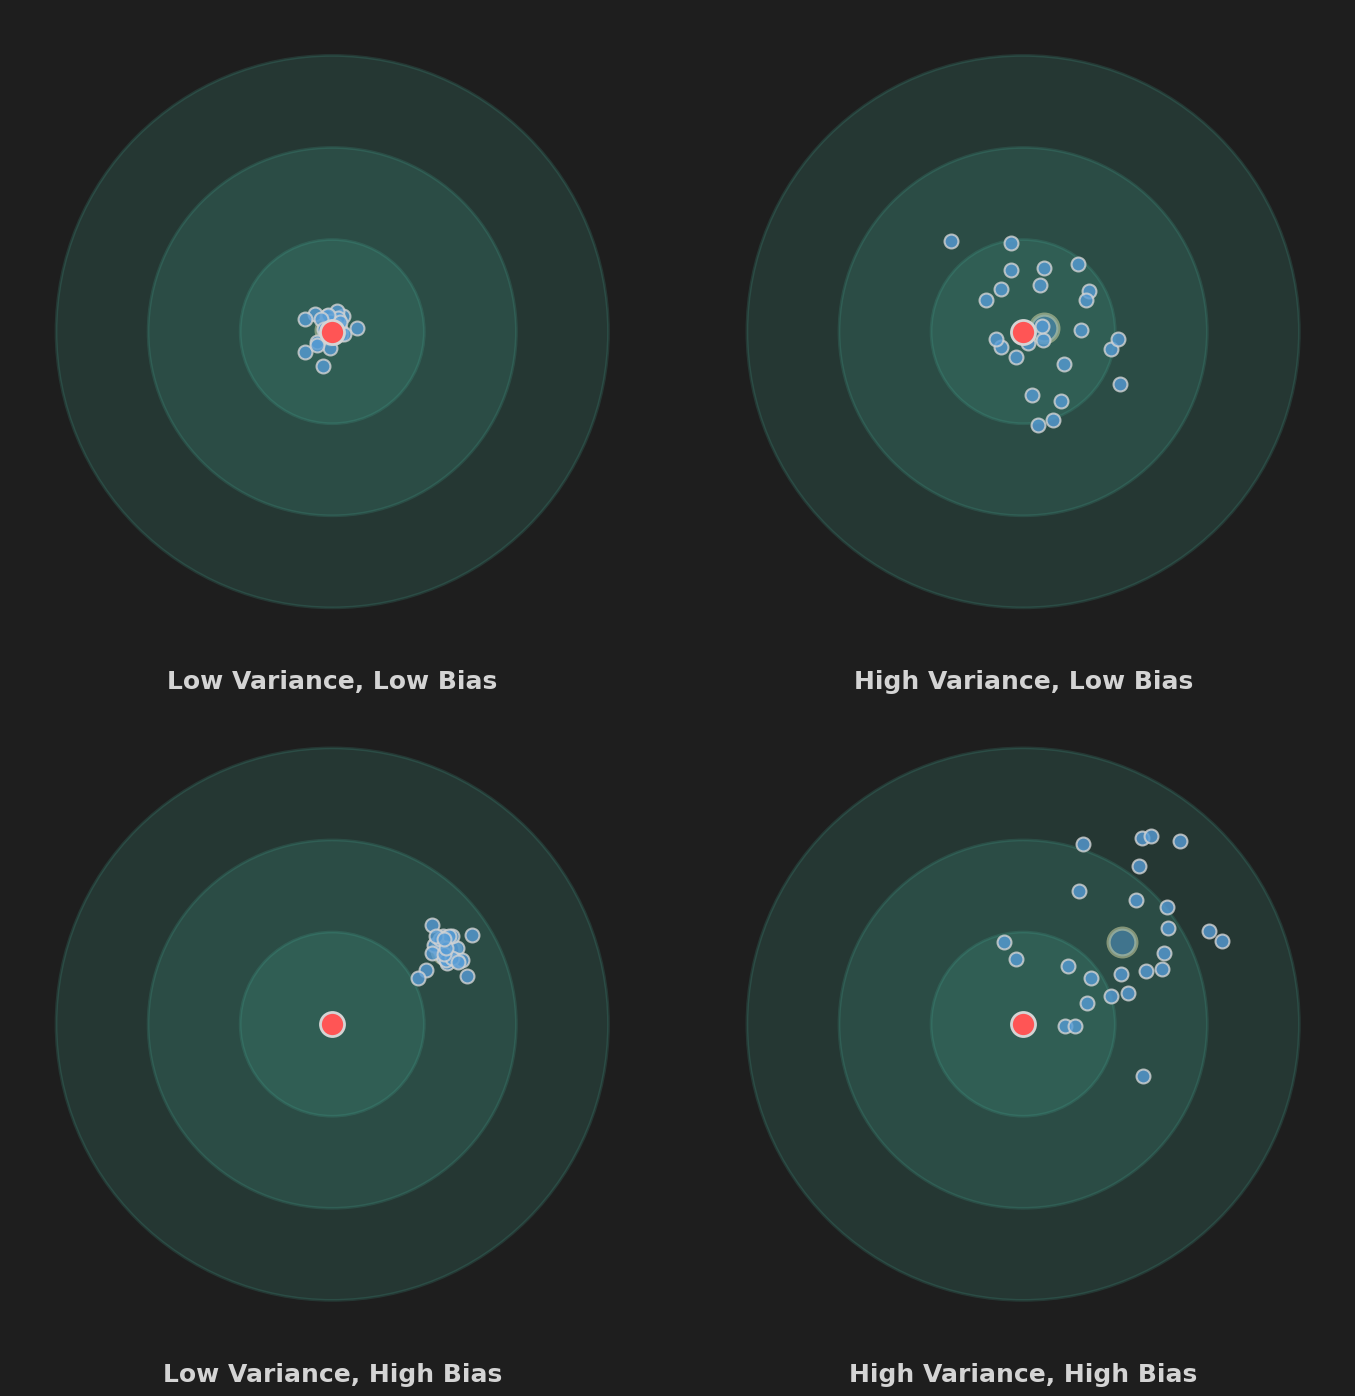

In [28]:
from src.bias_variance_plot import plot_bias_variance
plot_bias_variance(COLORS)

# References

1. Stanford University. (2022). *[Stanford CS109: Introduction to Probability for Computer Scientists I (YouTube playlist)](https://www.youtube.com/playlist?list=PLoROMvodv4rOpr_A7B9SriE_iZmkanvUg)*.

2. Babushkin, V., & Kravchenko, A. (2025). *[Machine Learning System Design: With end-to-end examples](https://www.manning.com/books/machine-learning-system-design)*. Manning Publications.

3. Aggarwal, C. C. (2024). *[Probability and Statistics for Machine Learning: A Textbook](https://link.springer.com/book/10.1007/978-3-031-53282-5)*. Springer Nature Switzerland AG.
